<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Сбор основных фактов по фильмам и сериалам в жанре "историческое фэнтези" (wuxia) с сайта mydramalist.com.

In [1]:
# импорт библиотек
from bs4 import BeautifulSoup
import requests
import re
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# урл фильтра (страна = Китай, жанр = уся)
part_url = 'https://mydramalist.com/search?adv=titles&co=2&ge=20&so=relevance&page='

In [3]:
# контейнер
dorama_data = []

In [4]:
# сбор данных по фильтру

for i in range(1, 43):
    time.sleep(1)
    url=part_url + str(i)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    page_list=soup.find_all('div', class_='col-xs-9 row-cell content')
    for dorama in page_list:
        row = []
        row.append(dorama.find('a').text) # название
        row.append(dorama.find('a', class_='btn simple btn-manage-list')['data-id']) # ид
        row.append(dorama.find('a')['href']) # url
        description = dorama.find('span', class_='text-muted').text
        row.append(description) # описание
        t = re.search('([A-z ]+) -', description).group()
        row.append(' '.join(t.split()[:-2])) # страна
        row.append(t.split()[-2]) # тип
        try:
            row.append(int(re.search('(?<=- )\d{4}', description).group())) # год
        except:
            row.append(0) # если года нет 
        try:
            row.append(int(re.search('\d+(?= episodes)', description).group())) # эпизоды
        except:
            row.append(0) # если эпизодов нет
        try:
            rating = dorama.find('span', class_='p-l-xs score').text
            if len(rating) == 0:
                rating = '99.9'
        except:
            rating = '99.9' # если рейтинга нет
        row.append(rating) # рейтинг            
        dorama_data.append(row)

In [6]:
# причесывание дф
df_wuxia = pd.DataFrame(dorama_data)
df_wuxia.columns=['title', 'id', 'xx', 'xxx', 'country', 'type', 'year', 'episodes', 'rating']
df_wuxia = df_wuxia.drop('xx', axis=1)
df_wuxia = df_wuxia.drop('xxx', axis=1)
df_wuxia.year = df_wuxia.year.astype('int') 
df_wuxia.rating = df_wuxia.rating.astype('float') 

In [9]:
# сохранение в csv
df_wuxia.to_csv('df_wuxia.csv', index=False)

In [7]:
df_wuxia

,title,id,country,type,year,episodes,rating
0,Nirvana in Fire,9025,Chinese,Drama,2015,54,9.1
1,The Untamed,28723,Chinese,Drama,2019,50,9.0
2,Joy of Life,28674,Chinese,Drama,2019,46,9.0
3,The Untamed Special Edition,53505,Chinese,Special,2019,20,9.0
4,Word of Honor - Epilogue,701663,Chinese,Special,2021,1,8.9
...,...,...,...,...,...,...,...
818,Jian Xing Tian Xia,11696,Chinese,Drama,2007,28,9.0
819,Legend of the Swordsman,11292,Chinese,Movie,2010,0,6.0
820,Longmen Express 2,11282,Chinese,Drama,2015,10,10.0
821,The Age of Heroes,11240,Chinese,Drama,2015,40,99.9


In [8]:
df_wuxia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     823 non-null    object 
 1   id        823 non-null    object 
 2   country   823 non-null    object 
 3   type      823 non-null    object 
 4   year      823 non-null    int32  
 5   episodes  823 non-null    int64  
 6   rating    823 non-null    float64
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 41.9+ KB


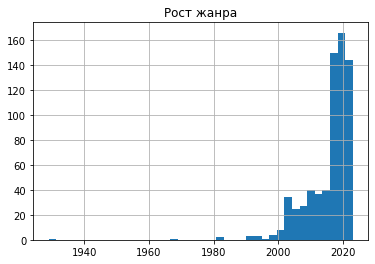

In [24]:
df_wuxia[df_wuxia.year > 0].year.hist(bins=40)
plt.title('Рост жанра')
plt.show()

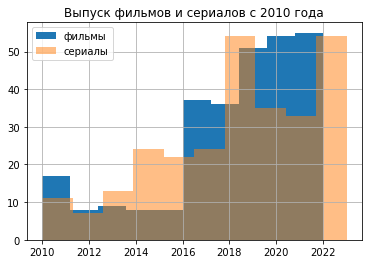

In [27]:
df_wuxia[(df_wuxia.year >= 2010) & (df_wuxia.type == 'Movie')].year.hist(label='фильмы')
df_wuxia[(df_wuxia.year >= 2010) & (df_wuxia.type == 'Drama')].year.hist(alpha=0.5, label='сериалы')
plt.legend()
plt.title('Выпуск фильмов и сериалов с 2010 года')
plt.show()

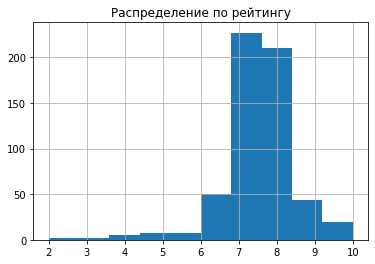

In [29]:
df_wuxia[(df_wuxia.rating > 0) & (df_wuxia.rating < 99)].rating.hist()
plt.title('Распределение по рейтингу')
plt.show()

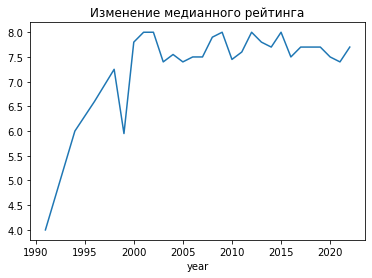

In [37]:
rate_year = df_wuxia[(df_wuxia.rating > 0) & (df_wuxia.rating < 99) & (df_wuxia.year != 0)
                    ].groupby('year')['rating'].median()

rate_year.plot.line()
plt.title('Изменение медианного рейтинга')
plt.show()

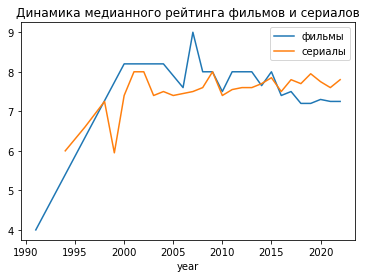

In [42]:
rate_year_m = df_wuxia[(df_wuxia.rating > 0) & (df_wuxia.rating < 99) & (df_wuxia.year != 0) & (df_wuxia.type == 'Movie')
                    ].groupby('year')['rating'].median()
rate_year_d = df_wuxia[(df_wuxia.rating > 0) & (df_wuxia.rating < 99) & (df_wuxia.year != 0) & (df_wuxia.type == 'Drama')
                    ].groupby('year')['rating'].median()

rate_year_m.plot.line(label='фильмы')
rate_year_d.plot.line(label='сериалы')
plt.title('Динамика медианного рейтинга фильмов и сериалов')
plt.legend()
plt.show()